<a href="https://colab.research.google.com/github/julianl11/projektarbeit_1/blob/main/pytorch_course/02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000

X,y = make_circles(n_samples=n_samples, noise=0.03, factor=0.5, random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.46463176  0.15322829]
 [-0.4601531   0.10446773]
 [-0.51775752  0.13568206]
 [-0.26599694  0.42143465]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [4]:
import pandas

In [5]:
circles_df = pandas.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "y": y[:]})
circles_df.head()

,X1,X2,y
0,0.464632,0.153228,1
1,-0.460153,0.104468,1
2,-0.517758,0.135682,1
3,-0.265997,0.421435,1
4,0.442208,-0.896723,0


In [6]:
import matplotlib.pyplot as plt

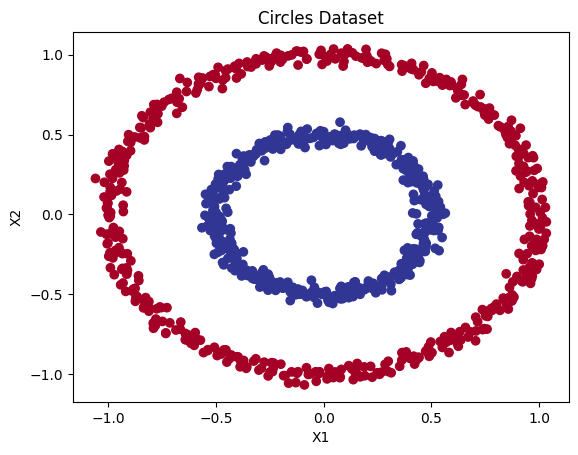

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Circles Dataset")
plt.show()

# Check input and output

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X_sample = X[0]
y_sample = y[0]

print(f"X: {X_sample}, y: {y_sample}")
print(f"X: {X_sample.shape}, y: {y_sample.shape}")

X: [0.46463176 0.15322829], y: 1
X: (2,), y: ()


In [10]:
import torch
print(torch.__version__)

2.6.0+cu124


In [11]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [12]:
type(X)

torch.Tensor

In [13]:
X[:5]

tensor([[ 0.4646,  0.1532],
        [-0.4602,  0.1045],
        [-0.5178,  0.1357],
        [-0.2660,  0.4214],
        [ 0.4422, -0.8967]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=33)

In [16]:
len(X_train), len(X_test)

(800, 200)

In [17]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [18]:
class CircleModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer_1 = nn.Linear(in_features=2, out_features=5)
    self.linear_layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x: torch.Tensor):

    return self.linear_layer_2(self.linear_layer_1(x))



In [19]:
model = CircleModel().to(device)
model

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
next(model.parameters())

Parameter containing:
tensor([[ 0.4976,  0.2457],
        [ 0.3905, -0.5216],
        [-0.0339,  0.7039],
        [-0.1325,  0.5534],
        [-0.0164, -0.3906]], device='cuda:0', requires_grad=True)

In [21]:
model_sequential = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=2)
)
print(model_sequential)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=2, bias=True)
)


In [22]:
model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.4976,  0.2457],
                      [ 0.3905, -0.5216],
                      [-0.0339,  0.7039],
                      [-0.1325,  0.5534],
                      [-0.0164, -0.3906]], device='cuda:0')),
             ('linear_layer_1.bias',
              tensor([-0.0062,  0.1899, -0.1481,  0.4394, -0.5107], device='cuda:0')),
             ('linear_layer_2.weight',
              tensor([[ 0.2669,  0.0033,  0.2970, -0.1894, -0.0549]], device='cuda:0')),
             ('linear_layer_2.bias', tensor([-0.3185], device='cuda:0'))])

In [23]:
with torch.inference_mode():
  untrained_preds = model(X_test.to(device))
print(f"Length of preds: {len(untrained_preds)} and shape {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)} and shape {y_test.unsqueeze(dim=1).shape}  ")

Length of preds: 200 and shape torch.Size([200, 1])
Length of test samples: 200 and shape torch.Size([200, 1])  


In [24]:
y_test.unsqueeze(dim=1)[:10], untrained_preds[:10]

(tensor([[0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.]]),
 tensor([[-0.6300],
         [-0.3091],
         [-0.4877],
         [-0.5223],
         [-0.2598],
         [-0.3104],
         [-0.3580],
         [-0.6083],
         [-0.2056],
         [-0.5315]], device='cuda:0'))

In [25]:
X_train[:10], y_train[:10]

(tensor([[ 0.9859, -0.0592],
         [ 1.0005, -0.3119],
         [-0.1628, -1.0567],
         [-0.3379, -0.3772],
         [-0.9720,  0.3617],
         [ 0.2593, -1.0015],
         [ 0.2998,  0.4528],
         [ 0.3661, -0.3449],
         [-0.4697,  0.1980],
         [ 0.1170, -0.4774]]),
 tensor([0., 0., 0., 1., 0., 0., 1., 1., 1., 1.]))

# loss & optimizer

In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [27]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [28]:
model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.4976,  0.2457],
                      [ 0.3905, -0.5216],
                      [-0.0339,  0.7039],
                      [-0.1325,  0.5534],
                      [-0.0164, -0.3906]], device='cuda:0')),
             ('linear_layer_1.bias',
              tensor([-0.0062,  0.1899, -0.1481,  0.4394, -0.5107], device='cuda:0')),
             ('linear_layer_2.weight',
              tensor([[ 0.2669,  0.0033,  0.2970, -0.1894, -0.0549]], device='cuda:0')),
             ('linear_layer_2.bias', tensor([-0.3185], device='cuda:0'))])

In [35]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_train.to(device))
y_logits[:5]

tensor([[-0.2820],
        [-0.3277],
        [-0.6434],
        [-0.5409],
        [-0.4961]], device='cuda:0')

In [36]:
y_preds_prob = torch.sigmoid(y_logits)
y_preds_prob[:5]

tensor([[0.4300],
        [0.4188],
        [0.3445],
        [0.3680],
        [0.3785]], device='cuda:0')

In [41]:
y_preds = torch.round(y_preds_prob)[:5]

y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))
print(torch.eq(y_preds, y_pred_labels.squeeze()))
#

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]], device='cuda:0')
